# PROJET IA for HumanForYou

|Auteur|
|---|
|G. DUBOYS DE LAVIGERIE|
|T. VILETTE|
|O. BOUSSARD|
|A. BRICON|

## Objectifs du Livrable

Le présent document constitue le premier livrable du projet IA pour HumanForYou, visant à analyser et traiter les différentes données fournies par l'entreprise dans le but de comprendre les facteurs influençant le taux de rotation des employés. Les objectifs principaux de ce livrable sont les suivants :

1. **Compréhension des données :** Explorer et comprendre les différentes sources de données fournies par HumanForYou, y compris les données des ressources humaines, les évaluations des managers, les enquêtes sur la qualité de vie au travail et les horaires de travail.

2. **Prétraitement des données :** Nettoyer les données en éliminant les valeurs manquantes, en identifiant et en traitant les éventuelles erreurs ou incohérences, et en préparant les données pour l'analyse et la modélisation.

3. **Exploration des données :** Effectuer une analyse exploratoire des données pour identifier les tendances, les relations et les motifs significatifs pouvant influencer le taux de rotation des employés.

4. **Visualisation des données :** Utiliser des techniques de visualisation de données pour représenter graphiquement les principales caractéristiques des données et faciliter la compréhension des résultats.

5. **Préparation des données pour la modélisation :** Préparer les données en sélectionnant les variables pertinentes, en transformant les variables catégorielles en variables numériques, et en divisant les données en ensembles d'entraînement et de test pour la modélisation.

## Attendus

À la fin de ce livrable, nous nous attendons à ce que les données fournies par HumanForYou soient prêtes à être analysées et utilisées pour la modélisation. Nous fournirons une analyse détaillée de la qualité des données, des tendances et des relations identifiées, ainsi qu'une documentation complète sur les étapes de prétraitement des données.

### 1. Préparation de l'environnement

Pour faciliter l'importation des bibliothèques nécessaires au bon fonctionnement du code, veuillez exécuter le fichier `setup.ipynb`. Ce fichier s'occupe de configurer l'environnement en important toutes les librairies essentielles. 

In [91]:
# compatibilité python 2 et python 3
from __future__ import division, print_function, unicode_literals

# imports
import numpy as np
import os

# stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12



# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### 2. Import des données

Dans cette section, nous automatisons le processus d'importation des données en implémentant une fonction qui effectue les étapes suivantes :
1. Téléchargement de l'archive contenant les fichiers.
2. Extraction des fichiers de l'archive.

Le code ci-dessous réalise le chargement des fichiers suivants :
- `employee_survey_data.csv`
- `general_data.csv`
- `in_time.csv`
- `out_time.csv`
- `manager_survey_data.csv`

De même, on va créer une fonction utilisant [`pandas`](https://pandas.pydata.org/) qui charge les données en mémoire dans un [`Pandas DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame).

In [39]:
import os
import zipfile
from six.moves import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/"
REPO_PATH = "AnatholyB1/AI_A4/main/"
DATA_PATH = os.path.join("datasets", "all")
DATA_URL = DOWNLOAD_ROOT + REPO_PATH + "data.zip"

pd.set_option('display.max_columns', None)

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, "data.zip")
    urllib.request.urlretrieve(data_url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)

fetch_data()

def load_employee_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\employe", "employee_survey_data.csv")
    return pd.read_csv(csv_path)

def load_general_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\general", "general_data.csv")
    return pd.read_csv(csv_path)

def load_in_time_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\in_out_time", "in_time.csv")
    return pd.read_csv(csv_path)

def load_out_time_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\in_out_time", "out_time.csv")
    return pd.read_csv(csv_path)

def load_manager_data(housing_path=DATA_PATH):
    csv_path = os.path.join(housing_path + "\manager", "manager_survey_data.csv")
    return pd.read_csv(csv_path)

employee = load_employee_data()
general = load_general_data()
in_time = load_in_time_data()
out_time = load_out_time_data()
manager = load_manager_data()

<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:32: SyntaxWarning: invalid escape sequence '\i'
<>:36: SyntaxWarning: invalid escape sequence '\i'
<>:40: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:32: SyntaxWarning: invalid escape sequence '\i'
<>:36: SyntaxWarning: invalid escape sequence '\i'
<>:40: SyntaxWarning: invalid escape sequence '\m'
C:\Users\guill\AppData\Local\Temp\ipykernel_15528\3131000668.py:24: SyntaxWarning: invalid escape sequence '\e'
  csv_path = os.path.join(housing_path + "\employe", "employee_survey_data.csv")
C:\Users\guill\AppData\Local\Temp\ipykernel_15528\3131000668.py:28: SyntaxWarning: invalid escape sequence '\g'
  csv_path = os.path.join(housing_path + "\general", "general_data.csv")
C:\Users\guill\AppData\Local\Temp\ipykernel_15528\3131000668.py:32: SyntaxWarning: invalid escape sequence '\i'


### 3. Analyse des différentes données

#### 3.1. employee

In [40]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [5]:
employee.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


#### 3.2 General

| **Variable**           | **Type de données** | **Nombre de valeurs Manquantes** | **Nature de la variable** | **Nombre de catégories uniques** |
|------------------------|---------------------|----------------------------------|---------------------------|----------------------------------|
| **Age**                | Quantitative        | 0                                | Ordinal                   | 35                               |
| **Attrition**          | Qualitative         | 0                                | Nominal (Booléen)         | 2                                |
| **BusinessTravel**     | Qualitative         | 0                                | Ordinal                   | 3                                |
| **Department**         | Qualitative         | 0                                | Nominal                   | 3                                |
| **DistanceFromHome**   | Quantitative        | 0                                | Ordinal                   | 16                               |
| **Education**          | Quantitative        | 0                                | Ordinal                   | 5                                |
| **EducationField**     | Qualitative         | 0                                | Nominal                   | 6                                |
| **EmployeeCount**      | Quantitative        | 0                                | Ordinal                   | 1                                |
| **EmployeeID**         | Quantitative        | 0                                | Ordinal                   | 4410                             |
| **Gender**             | Qualitative         | 0                                | Nominal (Booléen)         | 2                                |
| **JobLevel**           | Quantitative        | 0                                | Ordinal                   | 5                                |
| **JobRole**            | Qualitative         | 0                                | Nominal                   | 9                                |
| **MaritalStatus**      | Qualitative         | 0                                | Nominal                   | 3                                |
| **MonthlyIncome**      | Quantitative        | 0                                | Ordinal                   | 1349                             |
| **NumCompaniesWorked** | Quantitative        | 19                               | Ordinal                   | 10                               |
| **Over18**             | Qualitative         | 0                                | Nominal                   | 1                                |
| **PercentSalaryHike**  | Quantitative        | 0                                | Ordinal                   | 14                               |
| **StandardHours**      | Quantitative        | 0                                | Ordinal                   | 1                                |
| **StockOptionLevel**   | Quantitative        | 0                                | Ordinal                   | 4                                |
| **TotalWorkingYears**  | Quantitative        | 9                                | Ordinal                   | 29                               |
| **TrainingTimesLastYear** | Quantitative      | 0                                | Ordinal                   | 7                                |
| **YearsAtCompany**     | Quantitative        | 0                                | Ordinal                   | 29                               |
| **YearsSinceLastPromotion** | Quantitative    | 0                                | Ordinal                   | 15                               |
| **YearsWithCurrManager** | Quantitative      | 0                                | Ordinal                   | 16                               |



In [35]:
# Supprimer useless colonnes
general_dr = general.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1)

# Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

general_num = general_dr.select_dtypes(include=[np.number]) 
num_attribs = list(general_num)

general_cat_ordinal = ['BusinessTravel']
general_cat_nominal = ['Attrition','Department','EducationField','Gender','JobRole','MaritalStatus']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat_nom", OneHotEncoder(), general_cat_nominal),
    ("cat_ord", OrdinalEncoder(), general_cat_ordinal),
])

# Appliquer le pipeline au DataFrame initial
general_tr = full_pipeline.fit_transform(general_dr)

# Créer un DataFrame à partir du résultat
general_prepared = pd.DataFrame(general_tr, columns=full_pipeline.get_feature_names_out())

general_prepared.head()
general_prepared.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   num__Age                                    4410 non-null   float64
 1   num__DistanceFromHome                       4410 non-null   float64
 2   num__Education                              4410 non-null   float64
 3   num__EmployeeID                             4410 non-null   float64
 4   num__JobLevel                               4410 non-null   float64
 5   num__MonthlyIncome                          4410 non-null   float64
 6   num__NumCompaniesWorked                     4410 non-null   float64
 7   num__PercentSalaryHike                      4410 non-null   float64
 8   num__StockOptionLevel                       4410 non-null   float64
 9   num__TotalWorkingYears                      4410 non-null   float64
 10  num__Trainin

#### 3.3 In_time

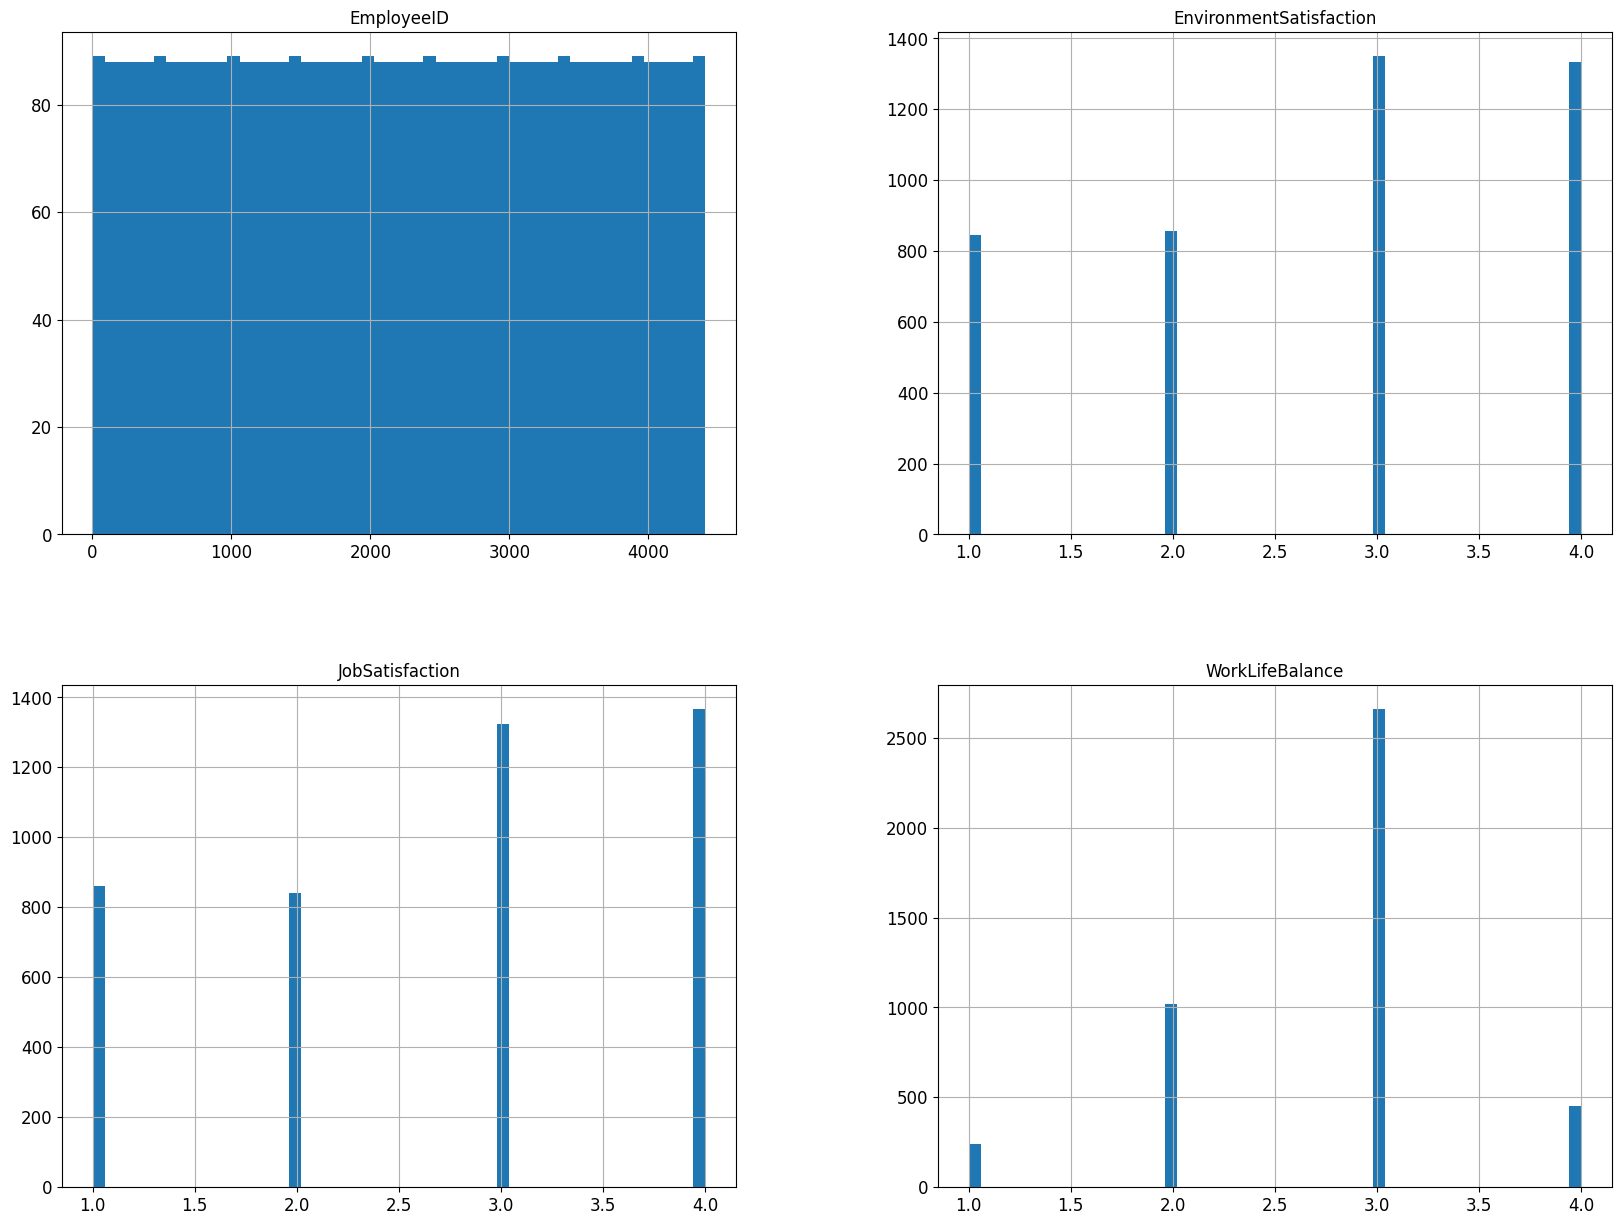

In [93]:
employee.hist(bins=50, figsize=(20,15))
plt.show()

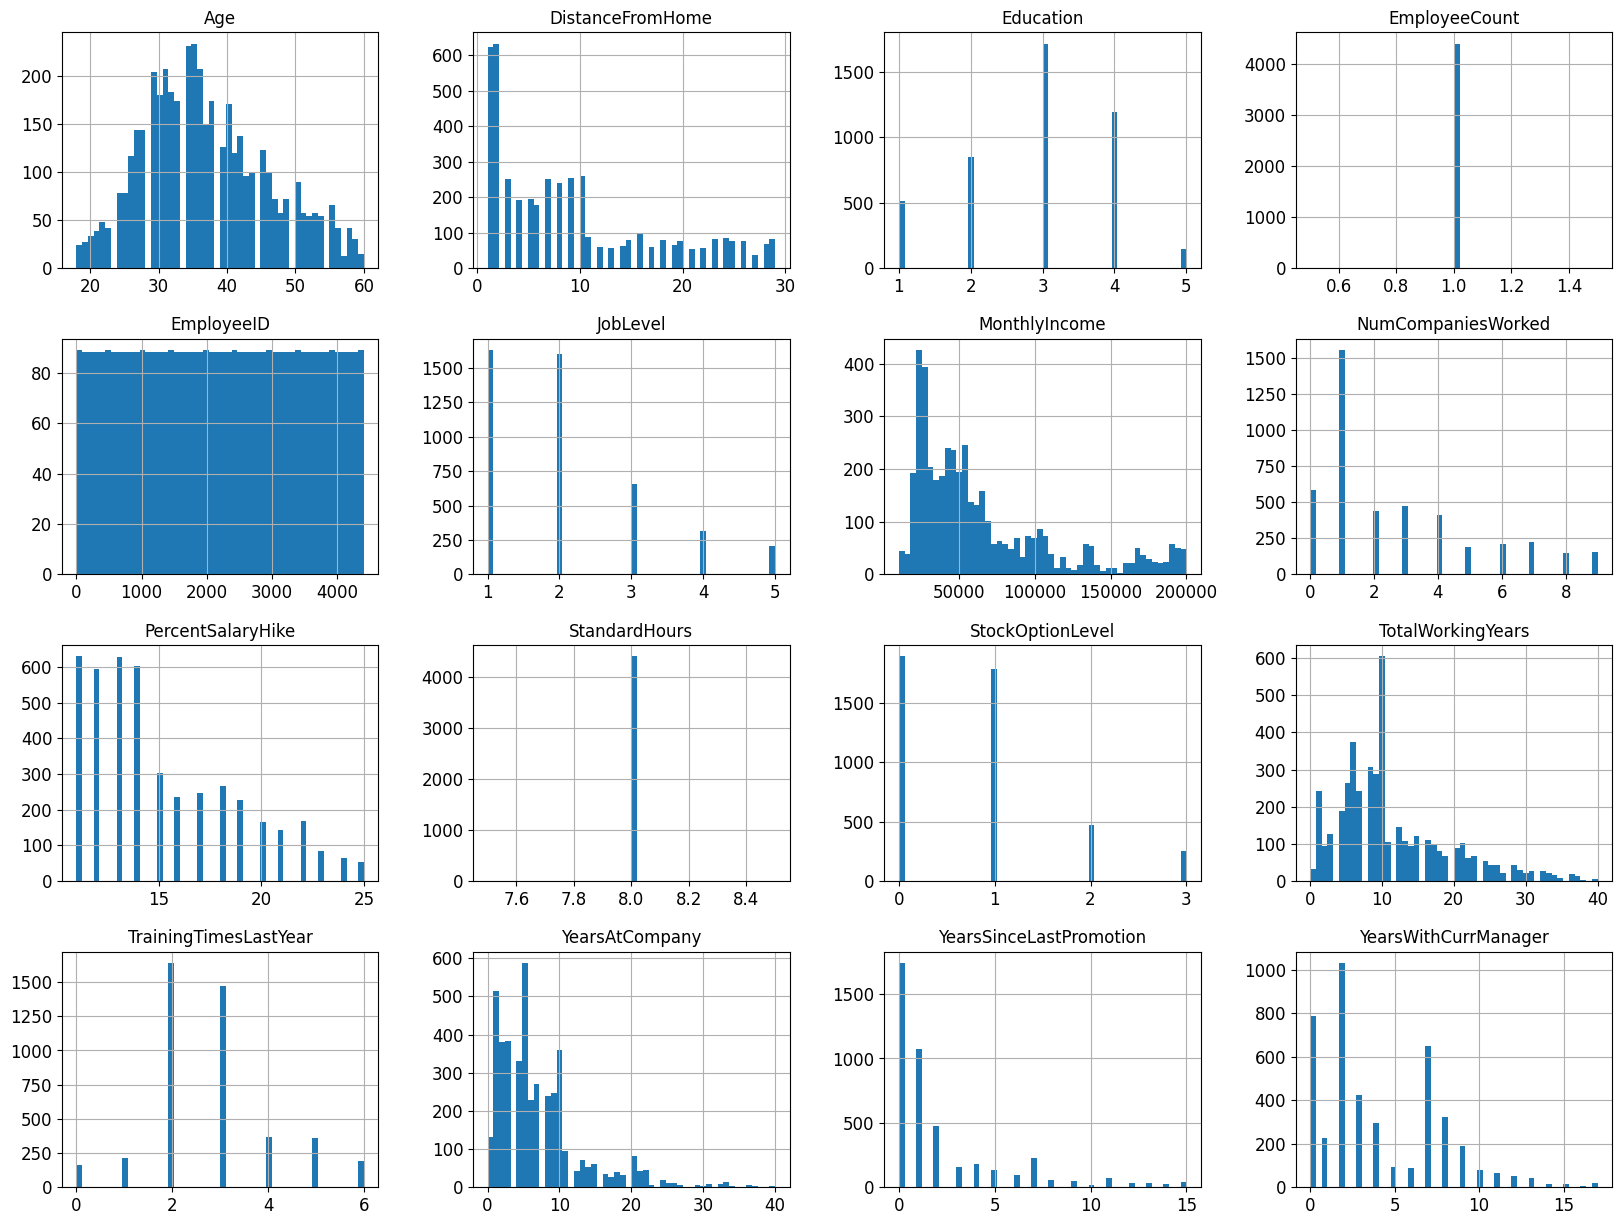

In [94]:
general.hist(bins=50, figsize=(20,15))
plt.show()

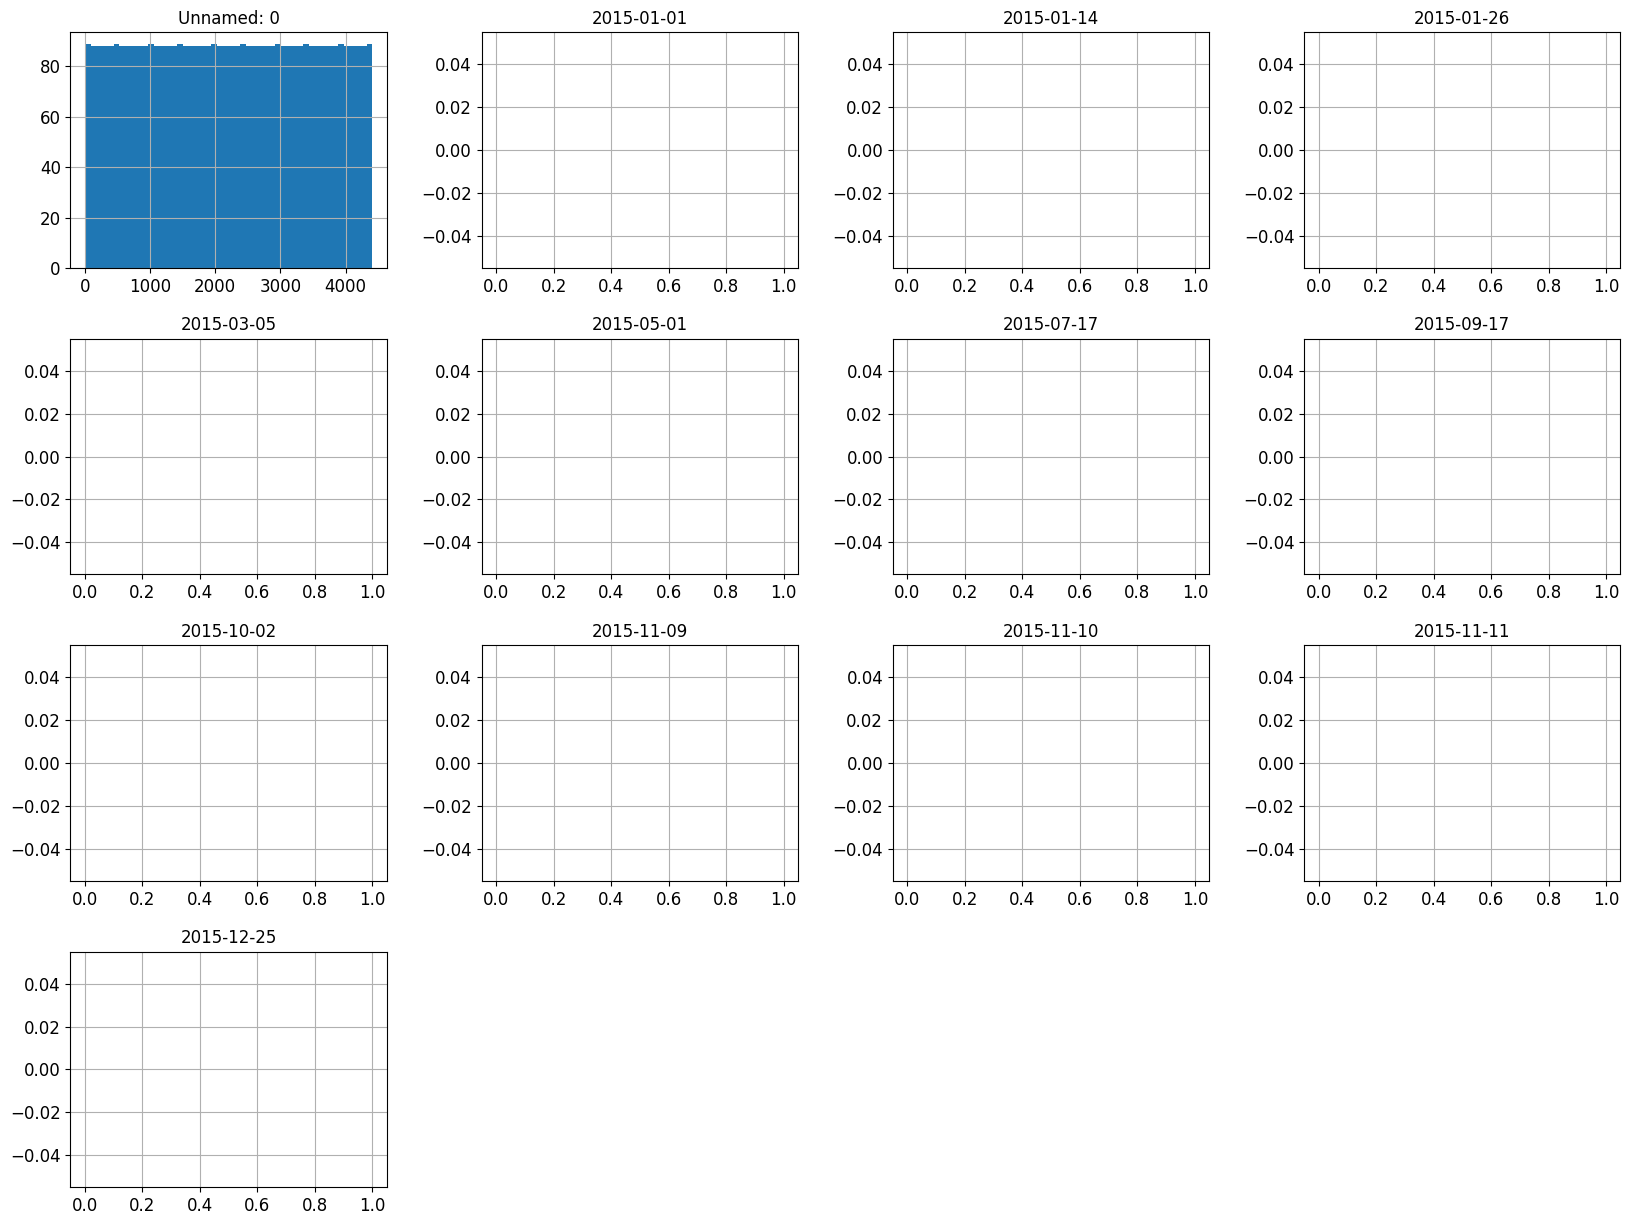

In [11]:
in_time.hist(bins=50, figsize=(20,15))
plt.show()

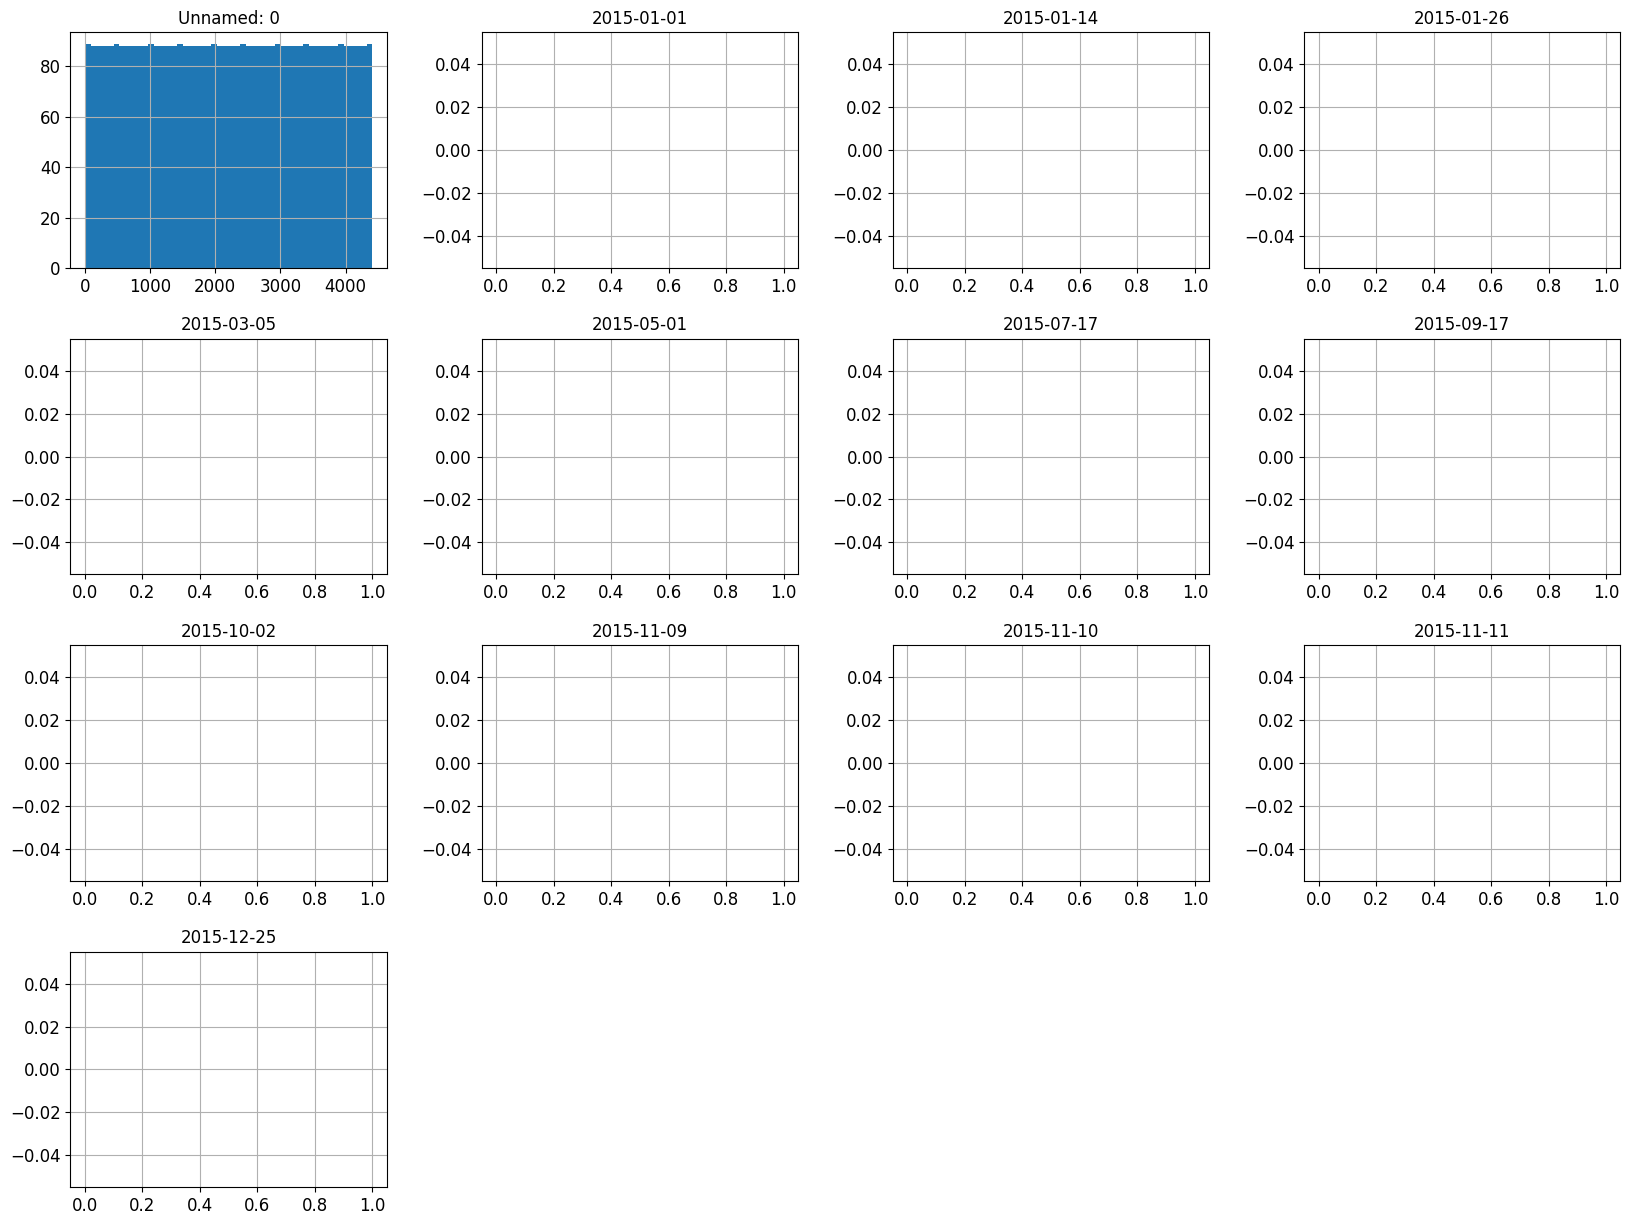

In [12]:
out_time.hist(bins=50, figsize=(20,15))
plt.show()

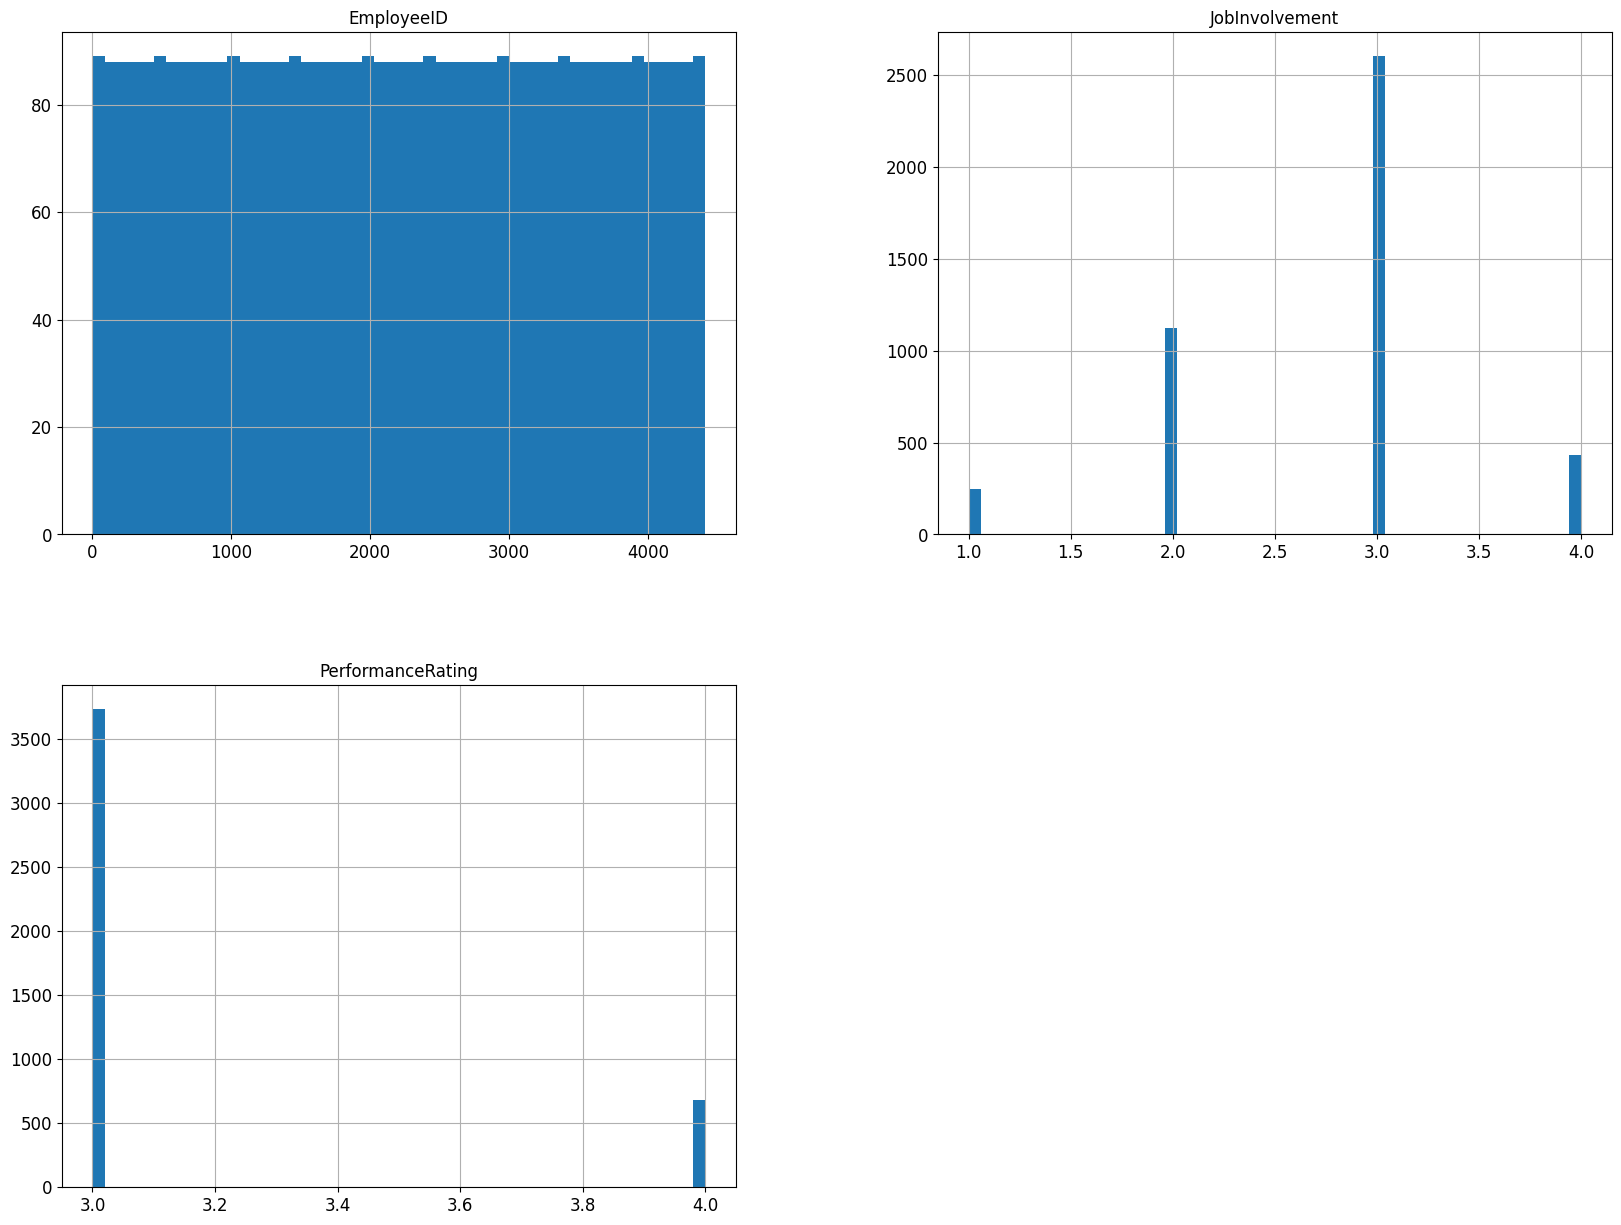

In [13]:
manager.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:

def convert_all_to_datetime(df):
    year_dict = {}
    month_dict = {}
    day_dict = {}

    for column_name in df.columns:
        try:
            df[column_name] = pd.to_datetime(df[column_name])
            year_dict[column_name + '-year'] = df[column_name].dt.year
            month_dict[column_name + '-month'] = df[column_name].dt.month
            day_dict[column_name + '-day'] = df[column_name].dt.day
        except ValueError:
            # Skip columns that cannot be converted to datetime
            pass

    year_df = pd.DataFrame(year_dict)
    month_df = pd.DataFrame(month_dict)
    day_df = pd.DataFrame(day_dict)

    df = pd.concat([df, year_df, month_df, day_df], axis=1)
    return df

in_time = convert_all_to_datetime(in_time)
out_time = convert_all_to_datetime(out_time)

In [15]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,Unnamed: 0-year,2015-01-01-year,2015-01-02-year,2015-01-05-year,2015-01-06-year,2015-01-07-year,2015-01-08-year,2015-01-09-year,2015-01-12-year,2015-01-13-year,2015-01-14-year,2015-01-15-year,2015-01-16-year,2015-01-19-year,2015-01-20-year,2015-01-21-year,2015-01-22-year,2015-01-23-year,2015-01-26-year,2015-01-27-year,2015-01-28-year,2015-01-29-year,2015-01-30-year,2015-02-02-year,2015-02-03-year,2015-02-04-year,2015-02-05-year,2015-02-06-year,2015-02-09-year,2015-02-10-year,2015-02-11-year,2015-02-12-year,2015-02-13-year,2015-02-16-year,2015-02-17-year,2015-02-18-year,2015-02-19-year,2015-02-20-year,2015-02-23-year,2015-02-24-year,2015-02-25-year,2015-02-26-year,2015-02-27-year,2015-03-02-year,2015-03-03-year,2015-03-04-year,2015-03-05-year,2015-03-06-year,2015-03-09-year,2015-03-10-year,2015-03-11-year,2015-03-12-year,2015-03-13-year,2015-03-16-year,2015-03-17-year,2015-03-18-year,2015-03-19-year,2015-03-20-year,2015-03-23-year,2015-03-24-year,2015-03-25-year,2015-03-26-year,2015-03-27-year,2015-03-30-year,2015-03-31-year,2015-04-01-year,2015-04-02-year,2015-04-03-year,2015-04-06-year,2015-04-07-ye

In [16]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 1048 entries, Unnamed: 0 to 2015-12-31-day
dtypes: datetime64[ns](262), float64(783), int32(3)
memory usage: 35.2 MB


In [17]:
in_time.value_counts('2015-12-18')

2015-12-18
2015-12-18 10:00:11    8
2015-12-18 10:04:49    8
2015-12-18 09:56:37    7
2015-12-18 10:00:17    7
2015-12-18 10:01:50    6
                      ..
2015-12-18 09:52:44    1
2015-12-18 09:52:42    1
2015-12-18 09:52:41    1
2015-12-18 09:52:40    1
2015-12-18 11:05:20    1
Name: count, Length: 2527, dtype: int64

suprimmer les colones qui ne sont pas des dates

In [18]:
cols_to_drop = in_time.filter(regex='-day$').columns
in_time = in_time.drop(cols_to_drop, axis=1)
cols_to_drop = in_time.filter(regex='-month$').columns
in_time = in_time.drop(cols_to_drop, axis=1)
cols_to_drop = in_time.filter(regex='-year$').columns
in_time = in_time.drop(cols_to_drop, axis=1)


first_column = in_time.columns[0]
in_time = in_time.drop([first_column], axis=1)
# Supprimer les colonnes où toutes les valeurs sont NaT
in_time = in_time.dropna(axis=1, how='all')

cols_to_drop = out_time.filter(regex='-day$').columns
out_time = out_time.drop(cols_to_drop, axis=1)
cols_to_drop = out_time.filter(regex='-month$').columns
out_time = out_time.drop(cols_to_drop, axis=1)
cols_to_drop = out_time.filter(regex='-year$').columns
out_time = out_time.drop(cols_to_drop, axis=1)


first_column = out_time.columns[0]
out_time = out_time.drop([first_column], axis=1)

# Supprimer les colonnes où toutes les valeurs sont NaT
out_time = out_time.dropna(axis=1, how='all')



# Assumons que 'in_time' et 'out_time' ont les mêmes index et les mêmes colonnes
for column in in_time.columns:
    # Trouver où les valeurs sont manquantes
    in_time_nan = in_time[column].isna()
    out_time_nan = out_time[column].isna()

    # Si 'in_time' est manquant, ajouter 8 heures à 'out_time'
    out_time.loc[in_time_nan, column] = out_time.loc[in_time_nan, column] - pd.Timedelta(hours=8)

    # Si 'out_time' est manquant, soustraire 8 heures à 'in_time'
    in_time.loc[out_time_nan, column] = in_time.loc[out_time_nan, column] + pd.Timedelta(hours=8)
    
    




In [19]:
in_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,NaT,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaT,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaT,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaT,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-04-03 10:00:30,2015-04-06 09:40:19,2015-04-07 10:16:43,2015-04-08 10:04:34,20

In [20]:
out_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,2015-01-16 17:35:11,NaT,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaT,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaT,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaT,2015-03-27 17:20:51,2015-03-30 17:33:09,2015-03-31 18:00:07,2015-04-01 17:32:50,2015-04-02 17:24:58,2015-04-03 17:11:46,2015-04-06 16:42:46,2015-04-07 17:55:07,2015-04-08 17:30:12,20